# Introduction to Time Series (Time Series)

     Basic approach using "pseudo data" on "electricity consumption" and a "railway company".

# Agenda
        1 - Primary analysis
        2 - Visualizing the time series
        3 - How to decompose a time series into its components
        4 - Exploratory Analysis and Feature Extraction
            Hypotheses:
                People travel more during the week.
                There are peak times because of the commutes for work.
                There are periods of the month when the demand for transport is highest.

In [1]:
# Data manipulation
import pandas as pd

# decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid') # pretty charts

## Importing data into memory

In [2]:
df = pd.read_csv('Electric_Production.csv')

df.head() 

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


## 1 - Primary analysis
         We need to know the DataFrame structure to learn how
         we must manipulate it (according to our intentions).
         In this case, because it is a very simple dataset,
         our approach will also be simplistic.

In [3]:
'''
    Note that the ['DATE'] column is an object type. So, let's convert your type to datetime, 
    as it is easier to work with data that involves data if they are in datetime format. This
    is because we will have access to methods that will facilitate our interaction with such data.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [4]:
print(df.DATE[0],'--> Tipo -->', type(df.DATE[0]))

01-01-1985 --> Tipo --> <class 'str'>


In [5]:
print("['DATE'] column in object(str) format:")
display(df.DATE.head())

['DATE'] column in object(str) format:


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

**Convert to datetime**

     The pd.to_datetime() method will help us with this task.

In [6]:
# We haven't converted yet, just visualizing how it will look
pd.to_datetime(df.DATE, format="%m-%d-%Y").head()

0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

**One way we can go here is to transform the column itself into the DataFrame index** <br>
Instead of simply changing the entire column. ps: this decision varies from case to case.

In [7]:
# Converting DATE to datetime and turning it into the dataframe index
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# Deleting DATE column, since we will use the index
df.drop("DATE", axis=1, inplace=True)

df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## 2 - Visulaizing the time series

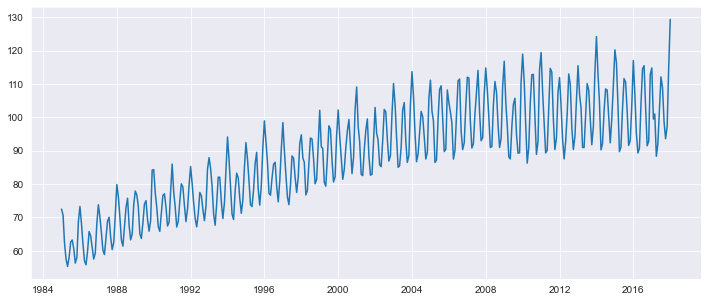

In [8]:
# Electricity consumption graph
plt.figure(figsize=(12,5)) # Figure attribute (size)
plt.plot(df.index, df.Value)
plt.show()

## 3 - How to decompose a Time Series into its components

     It is possible to decompose a time series to observe its components (trend, seasonality, noise ...).
     This might help us in some cases.

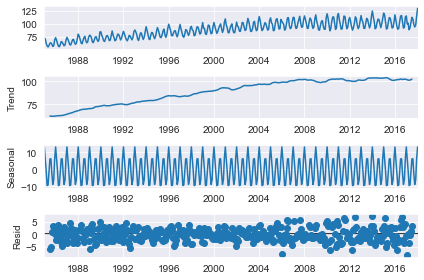

In [9]:
# Saving the decomposition in the variable decomposed_time_serie to use later
decomposed_time_serie = seasonal_decompose(df)

decomposed_time_serie.plot()
plt.show()

As you can see, above we have:
    
     Our graph (in smaller proportion)
     Its trend (shows us an increasing consumption of electricity)
     Its pattern
     Noise / error / residue

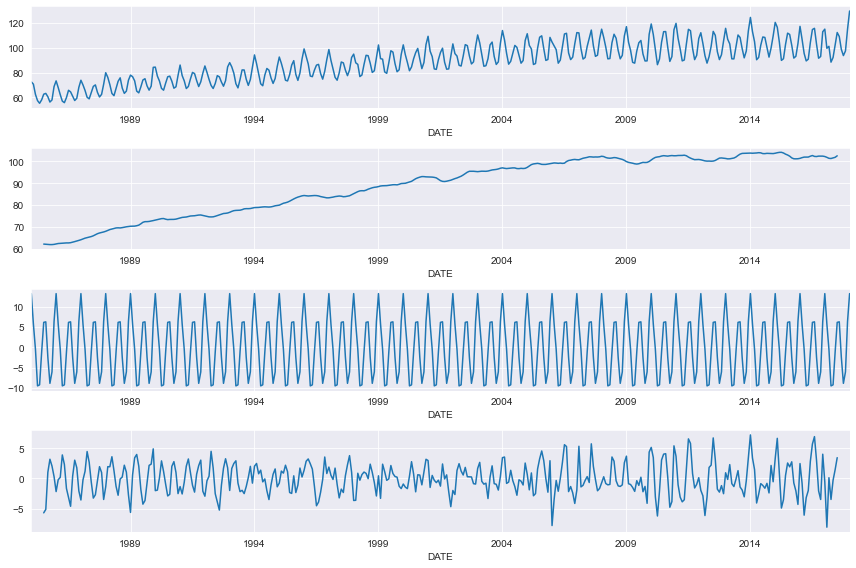

In [10]:
# Just changing the figure size
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,8))

decomposed_time_serie.observed.plot(ax=ax1)
decomposed_time_serie.trend.plot(ax=ax2)
decomposed_time_serie.seasonal.plot(ax=ax3)
decomposed_time_serie.resid.plot(ax=ax4)

plt.tight_layout()

## 4 - Exploratory Analysis and Feature Extraction

We will use a dataset containing the data of an alleged railway company that uses a new propulsion technology.

In [11]:
# The company data
df_trem = pd.read_csv("trem.csv")
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


    As before, the column with temporal data is not in datetime format.
    ps: as the ID column is unnecessary for us, we can simply "drop it".

In [12]:
df_trem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [13]:
# Deleting ['ID']
df_trem.drop(columns='ID', inplace=True)
df_trem.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [14]:
# Converting the Datetime column to datetime type
''' This time, we will not use it as an index, as we will use it in other ways '''
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

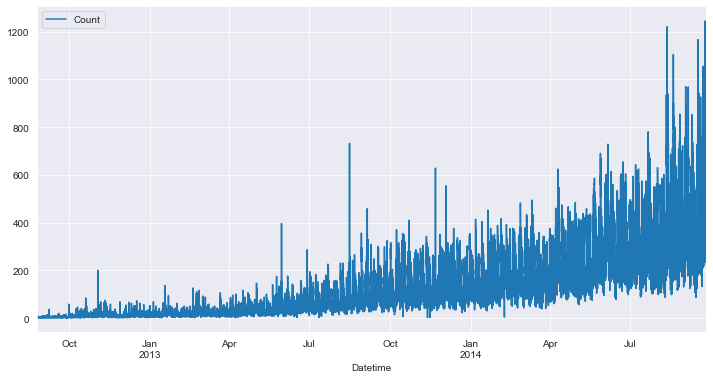

In [15]:
# Graph (messy and noisy)
fig, ax = plt.subplots(figsize=(12,6))
df_trem.plot(x='Datetime', y='Count', ax=ax)
plt.show()

### Hypotheses:
        People travel more during the week.
        There are peak times because of the commutes for work.
        There are periods of the month when the demand for transport is highest.

In [16]:
# Let's create features to analyze each period separately

df_trem['year']  = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day']   = df_trem.Datetime.dt.day
df_trem['hour']  = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

In [17]:
df_trem.head()

,Datetime,Count,year,month,day,hour,day_of_week
0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,2012-08-25 04:00:00,2,2012,8,25,4,5


- **People travel more during the week.**


To test whether this hypothesis is true, we can create a column with the <br>
weekend data (boolean already solves our problem) and then do the math.

     To do this, you need to know that 5 or 6 in ['day_of_week'] represent 
     Saturday and Sunday.

In [18]:
# Column with boolean values 
df_trem['weekend'] = 0

# There it is
df_trem.head()

,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,0
1,2012-08-25 01:00:00,2,2012,8,25,1,5,0
2,2012-08-25 02:00:00,6,2012,8,25,2,5,0
3,2012-08-25 03:00:00,2,2012,8,25,3,5,0
4,2012-08-25 04:00:00,2,2012,8,25,4,5,0


In [19]:
# If ['day_of_week'] is a weekend/Saturday or Sunday/5 or 6 ---> weekend = 1 (true)
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

df_trem.head()

,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [20]:
# Checking the amount of week x weekend values
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

Now, We can use groupby() and confirm our theory

In [21]:
df_trem.groupby('weekend').Count.sum()

weekend
0    2053298
1     487968
Name: Count, dtype: int64

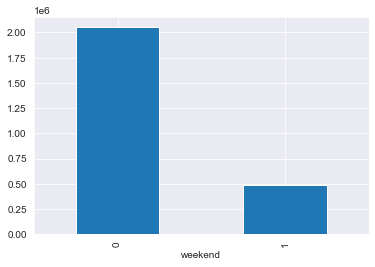

In [22]:
df_trem.groupby('weekend').Count.sum().plot.bar()
plt.show()

and We see that there are more people using transport during the week than on weekends.

- **There are peak times because of the commutes for work.**

We will do the same as before, however, as we already have a column with data available, let's jump straight to .groupby()

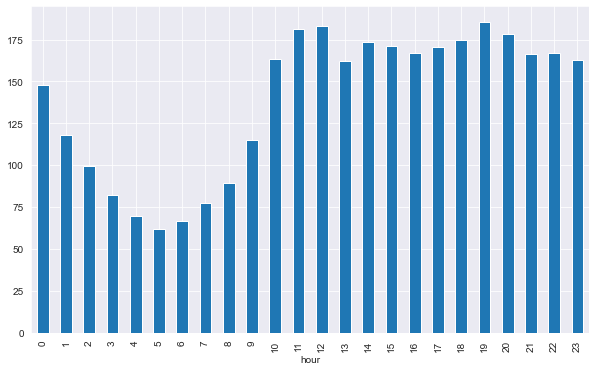

In [23]:
plt.figure(figsize=(10,6))
df_trem.groupby('hour').Count.mean().plot.bar()
plt.show()

Yes, there are peak hours, although during much of the use of transport the average number of people is apparently constant.

- **There are periods of the month when the demand for transport is highest.**

 Yup

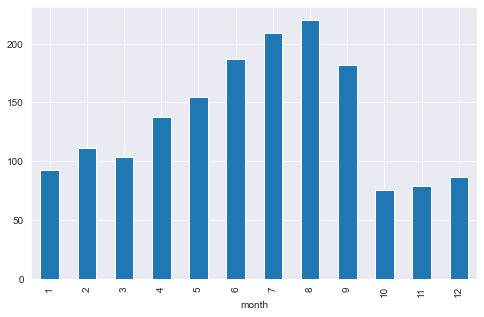

In [24]:
plt.figure(figsize=(8,5))
df_trem.groupby('month').Count.mean().plot.bar()
plt.show()